In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from scipy import sparse
from scipy.sparse import linalg as sla
from tqdm.notebook import tqdm
from pyusadel import (
    gen_assemble_fun,
    solve_usadel,
    solve_usadel_self_consistent,
    DifferentialOperators
)

In [5]:
h_x = np.zeros((1), dtype=float)
h_y = np.zeros((1), dtype=float)

In [6]:
T_c0 = 1
Delta_00 = T_c0 * 1.7652
h_c = Delta_00 / np.sqrt(2)

In [21]:
tau_so_inv = 0
tau_sf_inv = 0
    
diff_ops = DifferentialOperators()
diff_ops.L = np.array([[0]])
diff_ops.D_x = np.array([[0]])
diff_ops.D_y = np.array([[0]])
diff_ops.D_z = np.array([[0]])

D = 0
assemble_fun = gen_assemble_fun(diff_ops, D, tau_so_inv, tau_sf_inv)

T_N = 1
h_N = 41 

T_ax = np.linspace(0.05, 1.1, T_N)
h_ax = np.linspace(1.0, 1.4, h_N)

Deltas = np.zeros((T_N, h_N), dtype=float)
fsns = np.zeros((T_N, h_N), dtype=float)

for i, j in tqdm(np.ndindex(T_N, h_N), total=T_N * h_N):

    T = T_ax[i]
    h_x = np.zeros((1), dtype=float) + h_ax[j]
    h_y = np.zeros((1), dtype=float)
    Delta = np.ones((1), dtype=float)
    print(f"T = {T}, h = {h_ax[j]}")

    (theta, M_x, M_y, Delta, omega_ax, f_sn) = solve_usadel_self_consistent(
        assemble_fun,
        h_x,
        h_y,
        Delta,
        T,
        omega_N=50,
        gamma=1,
        tol=1e-6,
        max_iter=200,
        max_iter_delta=200,
    )

    Deltas[i, j] = Delta[0]
    fsns[i, j] = f_sn

    print(f"Delta = {Deltas[i, j]}, f_sn = {f_sn}")

  0%|          | 0/41 [00:00<?, ?it/s]

T = 0.05, h = 1.0
  1    Max Delta: 1.140    Residual: 1.23e-01    Free energy: -1.40e-01
  2    Max Delta: 1.308    Residual: 1.29e-01    Free energy: -2.95e-01
  3    Max Delta: 1.445    Residual: 9.50e-02    Free energy: -4.18e-01
  4    Max Delta: 1.547    Residual: 6.60e-02    Free energy: -4.89e-01
  5    Max Delta: 1.620    Residual: 4.49e-02    Free energy: -5.25e-01
  6    Max Delta: 1.670    Residual: 3.02e-02    Free energy: -5.43e-01
  7    Max Delta: 1.705    Residual: 2.01e-02    Free energy: -5.52e-01
  8    Max Delta: 1.728    Residual: 1.34e-02    Free energy: -5.56e-01
  9    Max Delta: 1.743    Residual: 8.82e-03    Free energy: -5.57e-01
 10    Max Delta: 1.753    Residual: 5.80e-03    Free energy: -5.58e-01
 11    Max Delta: 1.760    Residual: 3.81e-03    Free energy: -5.58e-01
 12    Max Delta: 1.765    Residual: 2.50e-03    Free energy: -5.59e-01
 13    Max Delta: 1.767    Residual: 1.64e-03    Free energy: -5.59e-01
 14    Max Delta: 1.769    Residual: 1.08e-03 

KeyboardInterrupt: 

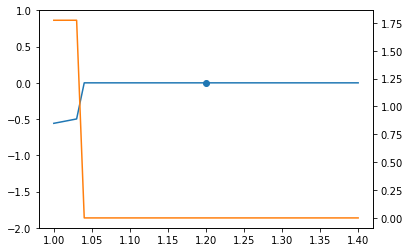

In [22]:
fig, ax = plt.subplots()
ax.plot(h_ax, fsns[0])
ax.set_ylim(-2, 1)

ax.twinx().plot(h_ax, Deltas[0], 'C1')
ax.scatter(1.2, 0)